# Predicting Real Estate House Prices with Linear Regression

## Read/Explore Data

In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.metrics import r2_score
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/danielmaxsiegel/gbc-datasets/main/real_estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
df.shape

(414, 8)

In [5]:
df.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [6]:
# Group dependent features in X
X = df.iloc[:,:-1]
X

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


In [7]:
y = df.iloc[:,-1]
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=123)

## Building and using the model

In [9]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [10]:
pred = regr.predict(X_test)
pred

array([42.12233806, 45.49313245, 39.14860297, 40.5324082 , 49.23454971,
       53.64047526, 41.80719074, 46.09224868, 28.02605996, 38.77234663,
       43.01999747, 44.55534937, 32.36803163, 35.70635443, 39.29744189,
       14.85857367, 48.25305379, 46.36477739, 35.73890764, 42.34763186,
       15.37608313, 40.06011338, 35.79949312, 40.89544253, 47.26304211,
       54.34949735, 13.49691545, 47.03517904, 13.36122886, 43.17153259,
       12.97751606, 46.99140984, 28.45993786, 42.04734413, 17.11765323,
       36.06836414, 43.89175509, 37.16527248, 43.69126696, 35.11710993,
       51.4087964 , 47.05326829, 33.92951453, 25.80990187, 32.74591596,
       47.3087225 , 42.22313182, 43.47430722, 39.32411531, 27.84805579,
       43.12130504, 43.71232761, 48.17382255, 24.84619746, 32.4403376 ,
       32.40442026, 48.37596277, 36.7913975 , 37.03414318, 36.19368527,
       38.44003263, 31.5928257 , 13.21063172, 30.82732796, 47.43439997,
       45.94079272, 45.23905468, 37.20195081, 37.30531289, 33.50

### Display the coefficients

A measure of how corralted the dependant variables are with the independant variable, in a nutshell

In [11]:
regr.coef_

array([-4.89505654e-03,  4.78237515e+00, -2.71467412e-01, -4.81209165e-03,
        1.05879843e+00,  2.23818589e+02, -3.42092793e+01])

In [12]:
# How well did the model perform?
r2_score(y_test, pred) 

0.6766499408050717

Not awesome, but better than a coin flip!

#### House Age Vs Price

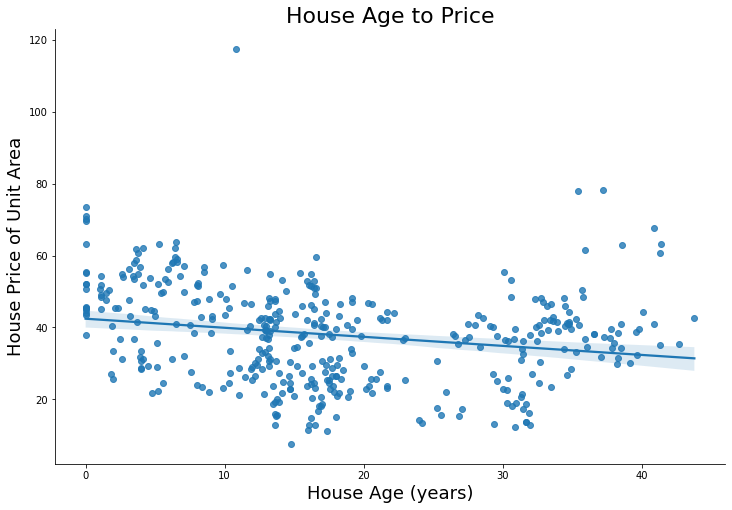

In [13]:
graph = sns.regplot(x="X2 house age", y="Y house price of unit area", data=df)
graph.set_title("House Age to Price", fontsize=22)
graph.set_xlabel("House Age (years)", fontsize = 18)
graph.set_ylabel("House Price of Unit Area", fontsize = 18)
graph.figure.set_size_inches(12,8)
sns.despine()

#### Distance to MRT station Vs Price

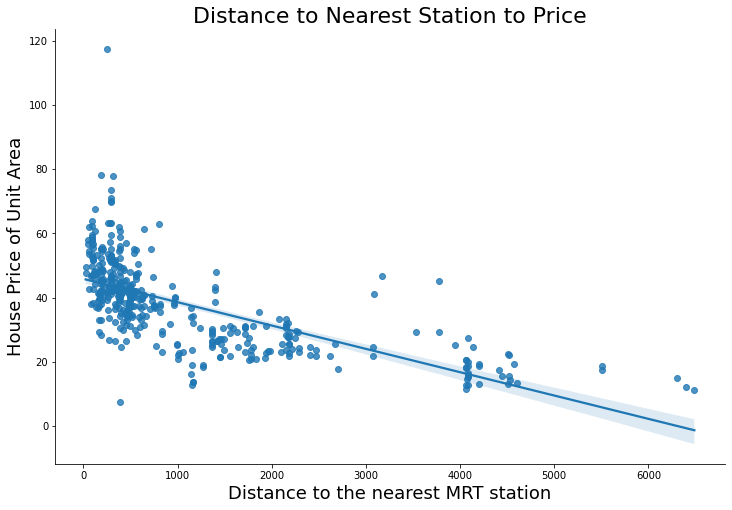

In [14]:
graph = sns.regplot(x="X3 distance to the nearest MRT station", y="Y house price of unit area", data=df)
graph.set_title("Distance to Nearest Station to Price", fontsize=22)
graph.set_xlabel("Distance to the nearest MRT station", fontsize = 18)
graph.set_ylabel("House Price of Unit Area", fontsize = 18)
graph.figure.set_size_inches(12,8)
sns.despine()

#### Number of Convienience Stores Vs Price

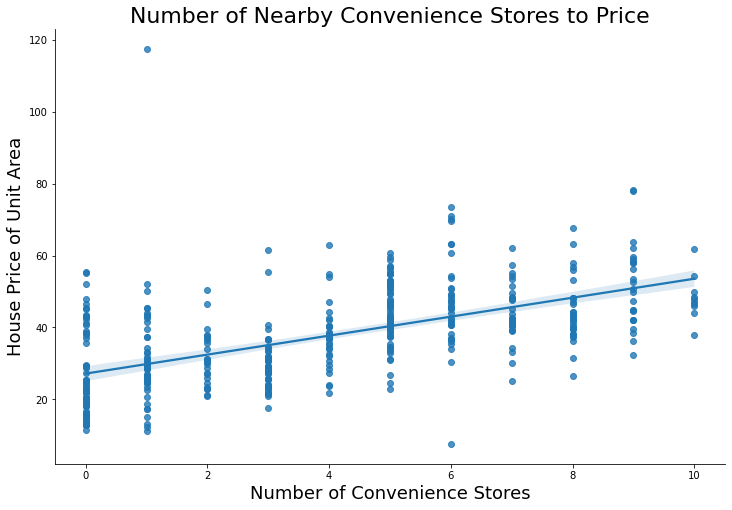

In [15]:
graph = sns.regplot(x="X4 number of convenience stores", y="Y house price of unit area", data=df)
graph.set_title("Number of Nearby Convenience Stores to Price", fontsize=22)
graph.set_xlabel("Number of Convenience Stores", fontsize = 18)
graph.set_ylabel("House Price of Unit Area", fontsize = 18)
graph.figure.set_size_inches(12,8)
sns.despine()